In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
sns.set_context("talk")


def get_hits_summary(hits_path, label = "label_placeholder", drop = None):
    # Check how many structures I retrieve
    colnames = ["query", "target", "fident", "alnlen", "mismatch", "qseq", "tseq", "qstart", "qend", "tstart", "tend", "evalue", "bits", "qcov", "tcov", "family"]
    hits_summary = pd.DataFrame()
    for file in glob.glob(hits_path):
        family = os.path.splitext(os.path.basename(file))[0]

        if os.path.getsize(file) > 0: 
            df = pd.read_csv(file, sep= "\t", header = None)
            if drop: 
                df.drop(df.columns[14:19], axis=1, inplace=True)
            df["family"] = family.replace("_filtered_hits", "")
            hits_summary = pd.concat([hits_summary, df])
    hits_summary = hits_summary.set_axis(colnames, axis='columns')
    hits_summary = hits_summary[["family", "query"]].drop_duplicates().groupby("family").count().reset_index().set_axis(["family", "found"], axis='columns')
    hits_summary["label"] = label
    return(hits_summary)

# Collect dataset infos

In [27]:
outdir = "../../../data/phylo3d_structures_af2db"
families = pd.read_csv(os.path.join(outdir, "SUMMARIES/input_sequences/stats_summary_report.csv"))
families.rename(columns = {"id":"family"}, inplace=True)
families.family = families.family.str.replace('.', "-", regex = False)

In [28]:
hits_1 = get_hits_summary(os.path.join(outdir, "SEARCH/filter/0.99_1/*.m8"),   label = "1")
hits_1_summary = hits_1.merge(families, on = "family", how = "outer").fillna(0)

In [36]:
hits_1_summary[hits_1_summary.missing == 0].family.tolist()

['PF00026',
 'PF00079',
 'PF00113',
 'PF00135',
 'PF00147',
 'PF00148',
 'PF00152',
 'PF00162',
 'PF00180',
 'PF00199',
 'PF00202',
 'PF00206',
 'PF00217',
 'PF00224',
 'PF00268',
 'PF00275',
 'PF00282',
 'PF00305',
 'PF00342',
 'PF00365',
 'PF00405',
 'PF00464',
 'PF00465',
 'PF00496',
 'PF00682',
 'PF00701',
 'PF00710',
 'PF00724',
 'PF00749',
 'PF00797',
 'PF00840',
 'PF01026',
 'PF01041',
 'PF01053',
 'PF01055',
 'PF01156',
 'PF01180',
 'PF01212',
 'PF01433',
 'PF02126',
 'PF02569',
 'PF02615',
 'PF02836',
 'PF03180',
 'PF03480',
 'PF05544',
 'PF13458',
 'PF13714',
 'PF16363']

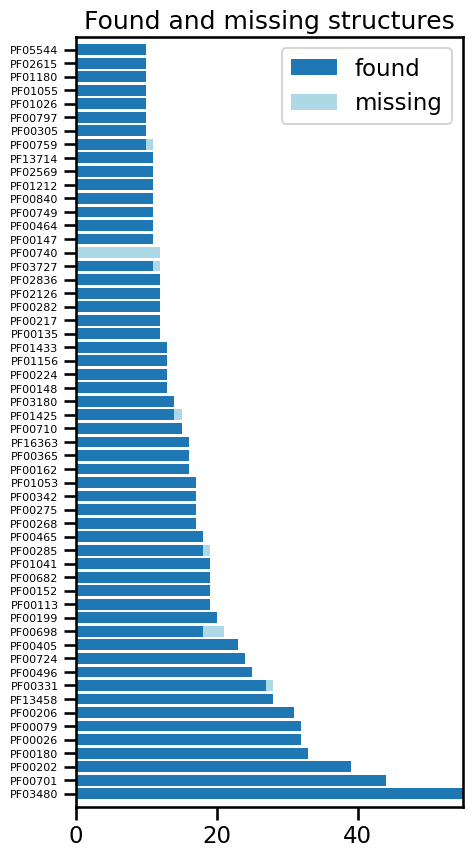

In [30]:
hits = hits_1_summary
hits["missing"] = hits.n_sequences- hits.found
hits = hits.sort_values(by=['n_sequences', "found"], ascending=False)
plt.figure(figsize=(5, 10))
plt.barh(hits.family, hits.found, label = "found")
plt.barh(hits.family, hits["missing"], left= hits.found, label = "missing", color = "lightblue")
plt.title("Found and missing structures")
plt.legend(loc = "upper right")
plt.margins(0.01)
plt.show()

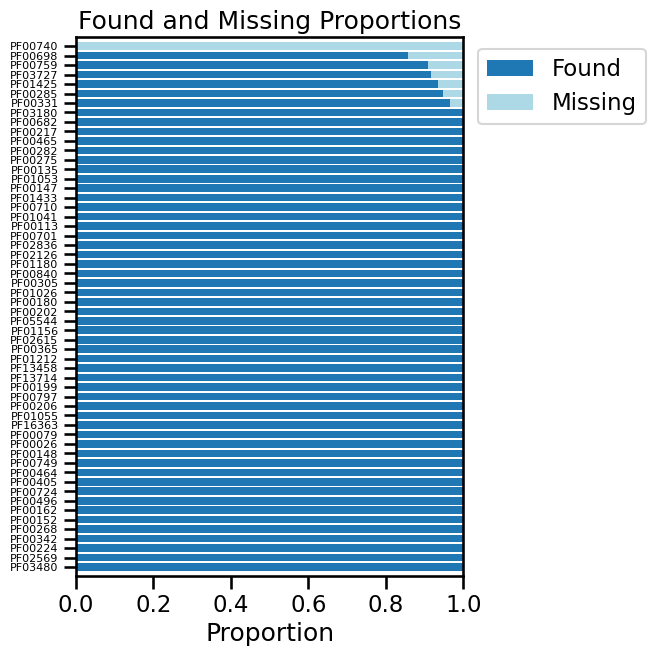

In [26]:
# Plot with proportions
# Calculate proportions
hits['found_proportion'] = hits['found'] / (hits['found'] + hits['missing'])
hits['missing_proportion'] = hits['missing'] / (hits['found'] + hits['missing'])

# Sort by the found_proportion in descending order
hits = hits.sort_values(by=['found_proportion'], ascending=False)

plt.figure(figsize=(5, 7))

# make labels smalle 
plt.rc('ytick', labelsize=8)
# Plot found proportions
plt.barh(hits.family, hits['found_proportion'], label="Found")

# Plot missing proportions next to found proportions
plt.barh(hits.family, hits['missing_proportion'], left=hits['found_proportion'], label="Missing", color="lightblue")

plt.title("Found and Missing Proportions" ) 
plt.xlabel("Proportion")
plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1))
plt.margins(0.01)
plt.show()